# Assignment 1 (Titanic)
## Problem Definition
The problem statement is to apply the tools of Machine Learning to develop a model that learns from a set of training data of passengers who survived or did not survive the Titanic disaster. The trained model must correctly classify and predict based on the given test dataset not containing the survival information, if the passengers in the test dataset survived or not.
## Import necessary libraries
The pandas, numpy and matplotlib libraries are needed for data visualisation and analysis, while scikit-learn gives us common classification algorithms that is used to develop the machine learning model.

In [2]:
# Data visualisation and analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#show plots in Jupyter Notebook browser
%matplotlib inline 


# Classification Machine Learning algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Prepare Data
### Load datasets
We are given two datasets, one for training (train.csv) and for testing (test_csv). We can start by acquiring both datasets into Pandas DataFrames.

In [3]:
# Import both train and test datasets
train_dataset = pd.read_csv("./datasets/train.csv")
test_dataset = pd.read_csv("./datasets/test.csv")

### Data Analysis
#### What variables are available in the dataset?

In [12]:
# print variables in dataset
print(train_dataset.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


From the output above, there are 12 variables in the test dataset. A brief description of each variable is shown in the table below.

|    Variable | Definition                                        | Key                                            |
|------------:|---------------------------------------------------|------------------------------------------------|
| PassengerId | Unique identifier for each observation in dataset |                                                |
| Survival    | Determine if the passenger survived               | 0 = No, 1 = Yes                                |
| Pclass      | Ticket class                                      | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex         | Gender                                            |                                                |
| Age         | Age in years                                      |                                                |
| Sibsp       | Number of siblings / spouses abroad the Titanic   |                                                |
| Parch       | Number of parents / children abroad the Titanic   |                                                |
| Ticket      | Ticket Number                                     |                                                |
| Fare        | Passenger fare                                    |                                                |
| Cabin       | Cabin Number                                      |                                                |
| Embarked    | Port of Embarkation                               | C = Cherbourg, Q = Queenstown, S = Southampton |


#### What types of variables are in the dataset

There are 2 float varaibles (Age, Fare), 5 integer variables (PassengerId, Survived, Pclass, Sibsp, Parch) and 5 object variables (Name, Sex, Ticket, Cabin, Embarked).
- __Categorical Data__ : Age, Fare, SibSp, Parch
- __Categorical Features__ : Survived, Sex, Embarked, Pclass
- __Alphanumeric Features__: Ticket (Mix of numeric and alphanumeric values), Cabin


In [5]:
# print train datasets attributes and number of values for each attribute
train_dataset.info()

# preview first 5 entries in train dataset
train_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# Summarize data for numerical variables
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Insights of numerical variables in dataset
- There are 891 passengers in the dataset
- The Age variable has (891 - 714) 177 missing values.
- Only 38% of passengers in the dataset survived by looking at the mean of the Survived variable.
- Fares vary greatly by looking at the high standard deviation, with the lowest being 0 dollars and highest being 512 dollars.

In [25]:
# include 'O' simply means only include object type variables in dataset
train_dataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Stankovic, Mr. Ivan",male,347082,B96 B98,S
freq,1,577,7,4,644


#### Insights of categorical variables in dataset
- Ticket varaible has a significantly high number of duplicates by looking at the number of unique values, (891 - 681) = 210
- Cabin varaible has a significantly high number of missing values, (891-204)= 687. Embarked has (891-889) 2 missing values.
- The number of unique names implies that each name is unique in the dataset (count=unique=891)
- Most passengers in the dataset emabarked at Southampton (644 passengers out of 889)
- Majority of passengers in dataset are males by looking at the "top" row for Sex column.(577/891 = 65%)

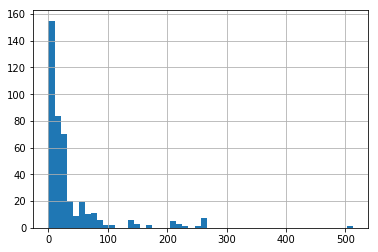

In [30]:
test_dataset["Fare"].hist()